Good Read

https://www.statology.org/label-encoding-vs-one-hot-encoding/

https://www.statology.org/dummy-variable-trap/

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_regression(n_samples=25, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression

In [3]:
from sklearn import linear_model 
lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
print(lin_reg_model.coef_,lin_reg_model.intercept_)

[57.87065454] -2.953778351562674


### Rigid Regression

In [5]:
ridge_reg_model = linear_model.Ridge(alpha=.5)
ridge_reg_model.fit(X_train,y_train)

,alpha,0.5
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [6]:
print(ridge_reg_model.coef_,ridge_reg_model.intercept_)

[55.90528864] -3.138209604273948


### Lasso

In [9]:
lasso_reg_model = linear_model.Lasso(alpha=0.5)
lasso_reg_model.fit(X_train,y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [11]:
lin_score = lin_reg_model.score(X_test, y_test)
ridge_score = ridge_reg_model.score(X_test, y_test)
lasso_score = lasso_reg_model.score(X_test,y_test)
print(lin_score,ridge_score,lasso_score)

0.9092465769972671 0.913353767003868 0.9110100780057474


In [12]:
y_pred_lin = lin_reg_model.predict(X_test)
y_pred_ridge = ridge_reg_model.predict(X_test)
y_pred_lasso = lasso_reg_model.predict(X_test)

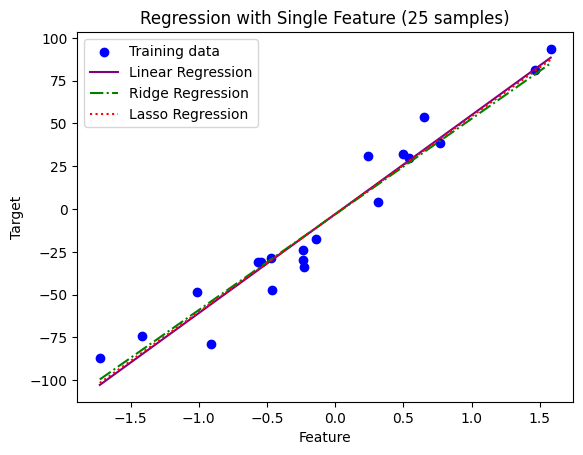

In [17]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
x_vals = np.linspace(X_train.min(), X_train.max(), 100)

y_pred_lin = lin_reg_model.intercept_ + lin_reg_model.coef_[0] * x_vals
plt.plot(x_vals, y_pred_lin, color='purple', label='Linear Regression')

y_pred_ridge = ridge_reg_model.intercept_ + ridge_reg_model.coef_[0] * x_vals
plt.plot(x_vals, y_pred_ridge, color='green', linestyle='-.', label='Ridge Regression')

y_pred_lasso = lasso_reg_model.intercept_ + lasso_reg_model.coef_[0] * x_vals
plt.plot(x_vals, y_pred_lasso, color='red', linestyle=':', label='Lasso Regression')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Regression with Single Feature (25 samples)')
plt.legend()
plt.show()